In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
n_actions = 10
n_steps = 10000
epsilon_values = [0.1, 0.01, 0]
alpha = 0.1

q_star = np.zeros(n_actions)

In [49]:
def epsilon_greedy_sample_averages(n_steps, epsilon, q_star):
    
    rewards = np.zeros(n_steps)
    optimal_actions = np.zeros(n_steps)
    Q = np.zeros(n_actions)
    action_counts = np.zeros(n_actions)
    
    for t in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q)

        rewards[t] = q_star[action] + np.random.normal(0, 0.01)
        optimal_actions[t] = (action == np.argmax(q_star))
        
        action_counts += 1
        Q[action] += (rewards[t] - Q[action]) / action_counts[action]
        
        # For nonstationary environment
        q_star += np.random.normal(0, 0.01, size=n_actions)
    
    return rewards, optimal_actions

In [50]:
def epsilon_greedy_constant_step_size(n_steps, epsilon, alpha, q_star):
    
    rewards = np.zeros(n_steps)
    optimal_actions = np.zeros(n_steps)
    Q = np.zeros(n_actions)
    
    for t in range (n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q)
        
        rewards[t] = q_star[action] + np.random.normal(0, 0.01)
        optimal_actions[t] = (action == np.argmax(q_star))
        
        Q[action] += alpha * (rewards[t] - Q[action])
        
        # For nonstationary environment
        q_star += np.random.normal(0, 0.01, size=n_actions)
    
    return rewards, optimal_actions

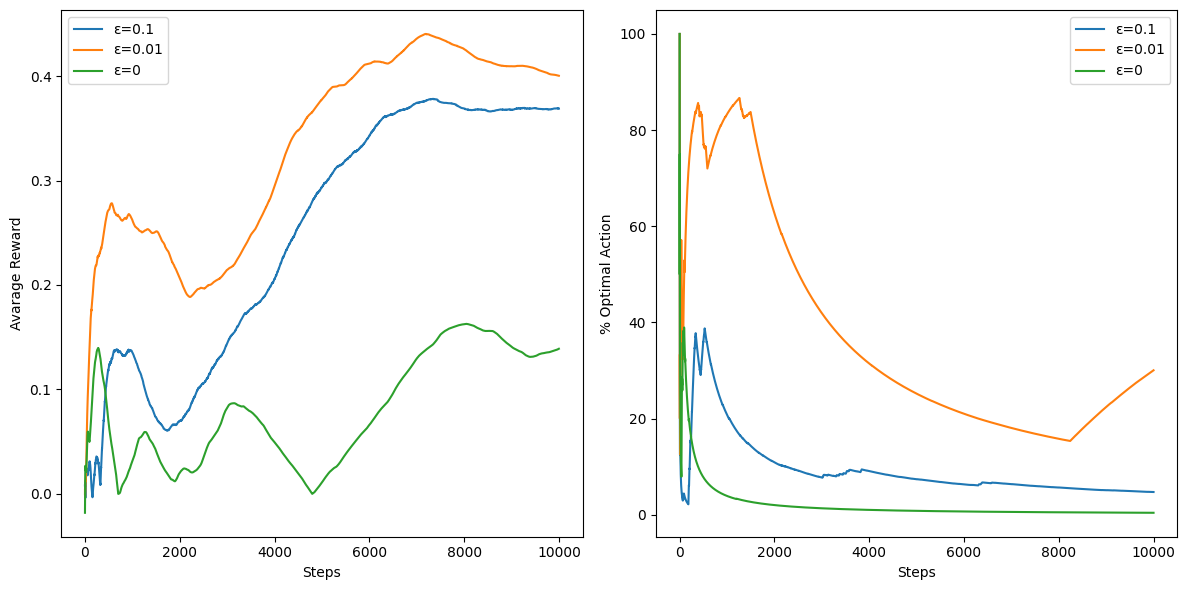

In [51]:
rewards_averages = {}
optimal_actions_averages = {}

for epsilon in epsilon_values:
    rewards_averages[epsilon], optimal_actions_averages[epsilon] = epsilon_greedy_sample_averages(n_steps, epsilon, np.zeros(n_actions))

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for average reward
plt.subplot(1, 2, 1)
for epsilon in epsilon_values:
    plt.plot(np.cumsum(rewards_averages[epsilon]) / (np.arange(n_steps) + 1), label=f"ε={epsilon}")
plt.xlabel('Steps')
plt.ylabel('Avarage Reward')
plt.legend()

# Plot for % optimal action
plt.subplot(1, 2, 2)
for epsilon in epsilon_values:
    plt.plot(np.cumsum(optimal_actions_avarages[epsilon]) / (np.arange(n_steps) + 1) * 100, label=f"ε={epsilon}")
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.legend()

plt.tight_layout()
plt.show()